# 画像の増やし方

In [1]:
from PIL import Image

In [2]:
# 画像の指定
IMAGE = '/workspace/image/raw/kinoko/DSCN0006.jpg'
# このあと表示させるここの画像のサイズ
CROP_SIZE = 100

In [3]:
# 画像を中心に正方形に切り抜き
def crop(image, size):
    im = Image.open(image)
    w = im.width
    h = im.height
    p = (w - h) / 2
    box = (p, 0, p+h, h)
    return im.crop(box).resize((size, size))

In [4]:
def rotate_and_flip(im):
    for i in im, im.transpose(Image.ROTATE_90):
        yield i
        yield i.transpose(Image.FLIP_LEFT_RIGHT)
        yield i.transpose(Image.FLIP_TOP_BOTTOM)
        yield i.transpose(Image.ROTATE_180)

In [5]:
dst = Image.new('RGB', (CROP_SIZE * 4, CROP_SIZE * 2), color=(255,255,255))

In [6]:
cropped = crop(IMAGE, CROP_SIZE)
for i, arranged in enumerate(rotate_and_flip(cropped)):
    x = CROP_SIZE * (i % 4)
    y = CROP_SIZE * int(i / 4)
    dst.paste(arranged, (x, y))  

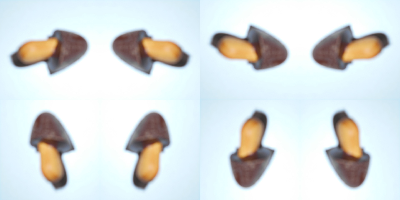

In [7]:
dst